In [2]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [3]:
X = pd.read_csv('data/processed_X.csv', index_col=None)
Y = pd.read_csv('data/processed_Y.csv', index_col=None)

In [78]:
obj_master = pd.read_csv('obj_master.csv', index_col=None)

In [86]:
# X base columns
truth_cols = list('ugriz') + ['y_truth', 'ra_truth', 'dec_truth', 'redshift', 'star',] 
truth_cols += ['size_bulge_true', 'size_minor_bulge_true', 'ellipticity_1_bulge_true', 'ellipticity_2_bulge_true', 'bulge_to_total_ratio_i']
truth_cols += ['size_disk_true', 'size_minor_disk_true', 'ellipticity_1_disk_true', 'ellipticity_2_disk_true',]
opsim_cols = ['m5_flux', 'PSF_sigma2', 'filtSkyBrightness_flux', 'airmass']
# Y base columns
drp_cols = ['x', 'xErr', 'y_obs', 'yErr', 'ra_obs', 'dec_obs', 'Ixx', 'Ixy', 'Iyy', 'IxxPSF', 'IxyPSF', 'IyyPSF', 'extendedness',]
drp_cols_prefix = ['cModelFlux_', 'psFlux_', 'cModelFluxErr_', 'psFluxErr_']
drp_cols_suffix = ['_base_CircularApertureFlux_70_0_instFlux', '_base_CircularApertureFlux_70_0_instFluxErr',
                     '_ext_photometryKron_KronFlux_instFlux', '_ext_photometryKron_KronFlux_instFluxErr']
drp_cols += [t[0] + t[1] for t in list(itertools.product(drp_cols_prefix, list('ugrizy')))]
drp_cols += [t[1] + t[0] for t in list(itertools.product(drp_cols_suffix, list('ugrizy')))]

In [99]:
star_cols = list('ugriz') + ['y_truth', 'ra_truth', 'dec_truth', 'redshift', 'star', 'agn'] 

In [101]:
extragal_cols = list(set(truth_cols) - set(star_cols))

In [87]:
set(truth_cols) - set(obj_master.columns.values)

set()

In [80]:
set(drp_cols) - set(obj_master.columns.values)

set()

In [110]:
obj_master = obj_master[truth_cols + opsim_cols + drp_cols]

### Check for NaNs in OpSim

In [105]:
obj_master[opsim_cols].isnull().sum()

m5_flux                   0
PSF_sigma2                0
filtSkyBrightness_flux    0
airmass                   0
dtype: int64

### How many rows in the Truth columns have null values?

In [92]:
obj_master.loc[obj_master['star']==False, truth_cols].isnull().sum()

u                              0
g                              0
r                              0
i                              0
z                              0
y_truth                        0
ra_truth                       0
dec_truth                      0
redshift                       0
star                           0
size_bulge_true                0
size_minor_bulge_true          0
ellipticity_1_bulge_true    7762
ellipticity_2_bulge_true    7762
bulge_to_total_ratio_i         0
size_disk_true                 0
size_minor_disk_true           0
ellipticity_1_disk_true        0
ellipticity_2_disk_true        0
dtype: int64

In [97]:
obj_master[(obj_master['ellipticity_1_bulge_true'].isnull()) & (obj_master['star']==False)].shape

(7762, 207)

In [98]:
obj_master.loc[(obj_master['star']==False) & (obj_master['bulge_to_total_ratio_i']==0.0), ['ellipticity_1_bulge_true', 'ellipticity_2_bulge_true']] = 0.0
obj_master.loc[obj_master['star']==False, truth_cols].isnull().sum()

u                           0
g                           0
r                           0
i                           0
z                           0
y_truth                     0
ra_truth                    0
dec_truth                   0
redshift                    0
star                        0
size_bulge_true             0
size_minor_bulge_true       0
ellipticity_1_bulge_true    0
ellipticity_2_bulge_true    0
bulge_to_total_ratio_i      0
size_disk_true              0
size_minor_disk_true        0
ellipticity_1_disk_true     0
ellipticity_2_disk_true     0
dtype: int64

### Setting extragal cols to zero for stars

In [104]:
obj_master.loc[obj_master['star']==True, extragal_cols] = 0.0
obj_master[truth_cols].isnull().sum()

u                           0
g                           0
r                           0
i                           0
z                           0
y_truth                     0
ra_truth                    0
dec_truth                   0
redshift                    0
star                        0
size_bulge_true             0
size_minor_bulge_true       0
ellipticity_1_bulge_true    0
ellipticity_2_bulge_true    0
bulge_to_total_ratio_i      0
size_disk_true              0
size_minor_disk_true        0
ellipticity_1_disk_true     0
ellipticity_2_disk_true     0
dtype: int64

### How many rows in the Object columns have null values?

In [108]:
obj_master[opsim_cols + truth_cols + drp_cols].isnull().sum()

m5_flux                                            0
PSF_sigma2                                         0
filtSkyBrightness_flux                             0
airmass                                            0
u                                                  0
g                                                  0
r                                                  0
i                                                  0
z                                                  0
y_truth                                            0
ra_truth                                           0
dec_truth                                          0
redshift                                           0
star                                               0
size_bulge_true                                    0
size_minor_bulge_true                              0
ellipticity_1_bulge_true                           0
ellipticity_2_bulge_true                           0
bulge_to_total_ratio_i                        

In [ ]:
obj_master

In [111]:
X = obj_master[truth_cols + opsim_cols]
Y = obj_master[drp_cols]

In [121]:
Y.head()

,x,xErr,y_obs,yErr,ra_obs,dec_obs,Ixx,Ixy,Iyy,IxxPSF,IxyPSF,IyyPSF,extendedness,cModelFlux_u,cModelFlux_g,cModelFlux_r,cModelFlux_i,cModelFlux_z,cModelFlux_y,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,psFlux_y,cModelFluxErr_u,cModelFluxErr_g,cModelFluxErr_r,cModelFluxErr_i,cModelFluxErr_z,cModelFluxErr_y,psFluxErr_u,psFluxErr_g,psFluxErr_r,psFluxErr_i,psFluxErr_z,psFluxErr_y,u_base_CircularApertureFlux_70_0_instFlux,g_base_CircularApertureFlux_70_0_instFlux,r_base_CircularApertureFlux_70_0_instFlux,i_base_CircularApertureFlux_70_0_instFlux,z_base_CircularApertureFlux_70_0_instFlux,y_base_CircularApertureFlux_70_0_instFlux,u_base_CircularApertureFlux_70_0_instFluxErr,g_base_CircularApertureFlux_70_0_instFluxErr,r_base_CircularApertureFlux_70_0_instFluxErr,i_base_CircularApertureFlux_70_0_instFluxErr,z_base_CircularApertureFlux_70_0_instFluxErr,y_base_CircularApertureFlux_70_0_instFluxErr,u_ext_photometryKron_KronFlux_instFlux,g_ext_photometryKron_KronFlux_instFlux,r_ext_photometryKron_KronFlux_instFlux,i_ext_photometryKron_KronFlux_instFlux,z_ext_photometryKron_KronFlux_instFlux,y_ext_photometryKron_KronFlux_instFlux,u_ext_photometryKron_KronFlux_instFluxErr,g_ext_photometryKron_KronFlux_instFluxErr,r_ext_photometryKron_KronFlux_instFluxErr,i_ext_photometryKron_KronFlux_instFluxErr,z_ext_photometryKron_KronFlux_instFluxErr,y_ext_photometryKron_KronFlux_instFluxErr
0,1618.239742,0.171847,567.412090,0.212016,56.306174,-29.752062,4.137529,0.920701,6.867937,2.066344,0.000100,2.060977,1.0,-235.895723,619.841910,1340.412469,2025.909695,3025.751644,3114.637877,-137.467933,346.218902,739.453235,1196.393827,1540.088703,1826.449102,191.759413,60.132860,32.318510,64.154359,134.711350,372.009558,111.373466,34.718758,19.036240,41.643590,74.652693,218.549786,93.228908,6.041033,9.581573,71.336785,-3.451245,145.719723,29.414078,10.480852,6.862693,14.937181,26.925987,58.268940,-0.555638,8.592126,19.913513,34.650223,47.268242,38.128962,3.521882,1.274850,0.850797,1.857295,3.282719,6.851517
1,2114.561292,0.110725,573.058793,0.083296,56.274419,-29.751934,2.117677,0.005441,2.487527,2.071024,-0.004497,2.065108,1.0,870.616963,715.745977,915.787382,1363.005078,2091.806324,2661.368469,843.781024,694.982706,879.586081,1305.937874,2007.908349,2617.250898,127.012131,34.598153,20.949825,41.402377,80.676802,230.218389,121.102271,33.168975,19.998683,39.538386,77.176336,219.216065,15.071725,26.183323,2.796428,51.353143,30.556683,61.283547,32.913997,10.472865,7.232829,14.549158,26.770895,56.844589,14.508876,12.453059,16.429423,23.358503,36.187005,46.895384,3.028085,0.963729,0.672110,1.343308,2.467079,5.176607
2,3737.662410,0.002869,583.021390,0.002905,56.170575,-29.751934,1.821108,0.009714,1.824362,1.840409,0.001102,1.836523,0.0,14360.358709,29703.877675,38244.247031,41455.324880,41865.250648,42065.861693,14406.782612,29793.750982,38308.106026,41566.086784,41955.257034,42097.665017,143.827811,70.990047,40.323067,54.563422,88.907984,236.300923,138.768210,69.286492,39.988394,54.360210,88.131383,225.408498,178.027144,542.002211,674.138263,753.120300,758.534281,766.744974,30.901446,10.196053,7.670706,14.149584,26.304921,55.801756,230.001750,493.888211,654.652554,716.484916,711.228510,665.397564,2.665954,1.170525,0.778020,1.264275,2.142231,4.406081
3,3033.330191,1.203852,581.264082,0.849833,56.215637,-29.751801,5.555165,-0.472147,1.496948,1.881104,0.000650,1.880701,1.0,212.608694,170.730313,149.047130,368.344759,389.226548,301.394200,102.598869,90.034303,92.820118,201.649257,276.681497,206.049586,151.825350,51.411120,34.566486,58.677486,126.304673,268.381971,110.873092,31.438165,20.230914,36.193207,74.876421,203.774838,18.382490,19.741072,-29.181814,-30.744280,-100.357501,30.942459,30.310608,10.646742,7.336128,13.902468,26.637547,53.631567,17.747822,3.933067,-0.602711,6.794721,-1.683138,-1.531157,11.509807,4.090277,2.782796,5.343990,10.094382,19.754061
4,970.930336,0.189281,589.874758,0.178817,56.347575,-29.750561,2.321785,-0.158652,1.759633,1.897737,0.002606,1.89

In [126]:
y_null_rows = np.logical_not(Y.isna().any(1))
X = X.loc[y_null_rows, :]
Y = Y.loc[y_null_rows, :]

In [129]:
X.head()

,u,g,r,i,z,y_truth,ra_truth,dec_truth,redshift,star,size_bulge_true,size_minor_bulge_true,ellipticity_1_bulge_true,ellipticity_2_bulge_true,bulge_to_total_ratio_i,size_disk_true,size_minor_disk_true,ellipticity_1_disk_true,ellipticity_2_disk_true,m5_flux,PSF_sigma2,filtSkyBrightness_flux,airmass
0,25.927355,24.529253,23.363397,22.937960,22.700953,22.573316,56.306179,-29.752071,0.400778,False,0.380860,0.289526,0.120091,0.064340,0.353941,0.316719,0.135184,0.354094,0.189709,0.059308,0.138092,11.735381,1.176519
1,21.626207,21.732993,21.706395,21.166993,21.046334,21.047500,56.274425,-29.751935,0.830948,False,0.320170,0.225307,0.103135,-0.140025,0.103571,0.114371,0.068944,0.146963,-0.199530,0.078585,0.134625,21.038838,1.194583
2,21.061823,20.182586,19.914711,19.831623,19.824885,19.832811,56.170575,-29.751933,0.000000,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191405,0.143784,55.443922,1.186149
3,24.046859,24.194966,24.321663,24.001080,23.924554,23.990327,56.215647,-29.751791,0.895289,False,0.038310,0.020526,-0.257676,0.157994,0.303802,0.021519,0.011137,-0.271019,0.166176,0.037397,0.204589,2.059797,1.401798
4,26.035478,25.751741,24.857420,24.524044,24.371037,24.297098,56.347578,-29.750544,0.492662,False,0.198197,0.150348,-0.047590,0.128771,0.057238,0.124826,0.092934,-0.050769,0.137371,0.034128,0.102330,3.628584,1.275934


In [130]:
X.min()

u                           16.536288
g                           15.360858
r                           14.687615
i                           14.367716
z                           14.142741
y_truth                     14.025314
ra_truth                    54.672903
dec_truth                  -29.752071
redshift                     0.000000
star                         0.000000
size_bulge_true              0.000000
size_minor_bulge_true        0.000000
ellipticity_1_bulge_true    -0.929392
ellipticity_2_bulge_true    -0.855253
bulge_to_total_ratio_i       0.000000
size_disk_true               0.000000
size_minor_disk_true         0.000000
ellipticity_1_disk_true     -0.789868
ellipticity_2_disk_true     -0.788658
m5_flux                      0.016757
PSF_sigma2                   0.056824
filtSkyBrightness_flux       1.270365
airmass                      1.001876
dtype: float64

In [132]:
Y.max()

x                                               2.732818e+04
xErr                                            7.566344e+03
y_obs                                           2.738709e+04
yErr                                            3.421381e+03
ra_obs                                          5.635514e+01
dec_obs                                        -2.826447e+01
Ixx                                             5.946083e+02
Ixy                                             1.480555e+02
Iyy                                             6.066783e+02
IxxPSF                                          5.134597e+00
IxyPSF                                          2.604479e-02
IyyPSF                                          4.876789e+00
extendedness                                    1.000000e+00
cModelFlux_u                                    1.371351e+06
cModelFlux_g                                    2.051108e+06
cModelFlux_r                                    2.279268e+06
cModelFlux_i            

### How bright are the objects?

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01, 7.7000e+01,
        3.6700e+02, 4.2000e+02, 5.2300e+02, 4.2600e+02, 3.4100e+02,
        4.5900e+02, 6.7600e+02, 1.2510e+03, 2.3240e+03, 4.4690e+03,
        8.9960e+03, 1.5222e+04, 1.8330e+04, 1.6257e+04, 1.1103e+04,
        2.8290e+03, 4.2000e+02, 1.1100e+02, 5.7000e+01, 6.8000e+01,
        6.8000e+01, 8.4000e+01, 7.6000e+01, 5.0000e+01, 3.2000e+01]),
 array([ 8.25301156,  9.0599216 ,  9.86683164, 10.67374168, 11.48065173,
        12.28756177, 13.09447181, 13.90138185, 14.70829189, 15.51520193,
        16.32211197, 17.12902202, 17.93593206, 18.7428421 , 19.54975214,
        20.35666218, 21.16357222, 21.97048227, 22.77739231, 23.58430235,
        24.39121239, 25.19812243, 26.00503247, 26.81194252, 27.61885256,
        28.4257626 , 29.23267264, 30.03958268, 30.84649272, 31.65340277,
        32.46031281]),
 <a list of 30 Patch objects>)

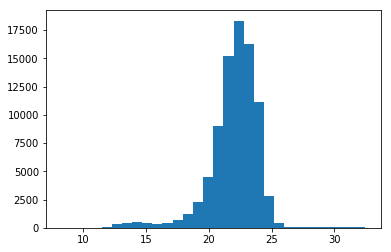

In [106]:
plt.hist(obj_master['i'].values, bins=30)

In [184]:
import units_utils as utils

units.mag_to_flux(X.loc[:, ['u', 'g', 'r', 'i', 'z', 'y_truth']].values, to_unit='nMgy')

array([[ 0.04256554,  0.15427614,  0.45148276,  0.66806091,  0.83103377,
         0.93470253],
       [ 2.23623294,  2.02676202,  2.07702715,  3.41352391,  3.81475175,
         3.81065894],
       [ 3.76071778,  8.45211778, 10.81721895, 11.67752132, 11.75022511,
        11.66475311],
       ...,
       [ 1.03676857,  1.09257849,  1.94276775,  2.61689518,  2.89272503,
         3.07546083],
       [ 0.12717103,  0.13836628,  0.2651003 ,  0.34261515,  0.36743436,
         0.38150147],
       [ 0.73020107,  0.74684303,  1.16276398,  2.30536295,  3.85209884,
         4.55581521]])

In [189]:
d = {'a': 1, 'b':2}
list(d.values())

[1, 2]

In [215]:
df.mean()

a    3.0
b    5.0
dtype: float64

In [192]:
l = [1, 2, 3]
dict(enumerate(l))

{0: 1, 1: 2, 2: 3}

In [258]:

df = pd.DataFrame({'a':[1,2,3], 'b': [4,5,6]})

In [259]:
df

,a,b
0,1,4
1,2,5
2,3,6


In [260]:
s = df.loc[[2, 1], ['a']].copy()
df.loc[[2, 1], ['a']] = s*2.0

In [261]:
df

,a,b
0,1.0,4
1,4.0,5
2,6.0,6


In [262]:
s

,a
2,3
1,2


### Visualize errors

In [179]:
def plot_2_cols(df, colname1, colname2):
    plt.plot(df[colname1].values, df[colname2].values, marker=',', linewidth=0.0)

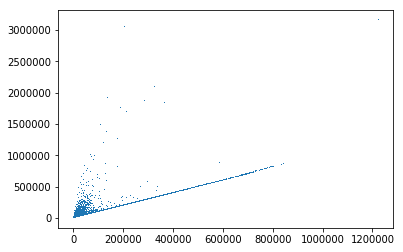

In [180]:
plot_2_cols(Y, 'psFlux_i', 'cModelFlux_i')

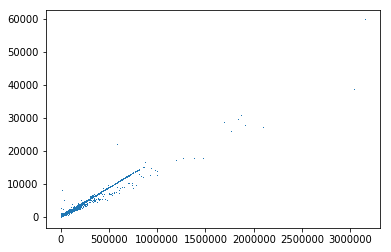

In [182]:
plot_2_cols(Y, 'cModelFlux_i', 'i_base_CircularApertureFlux_70_0_instFlux')

In [159]:
def plot_histogram_standardized(df, colname, err_colname, log=False, range=None):
    val = df[colname].values
    val_err = df[err_colname].values
    standardized = (val - np.mean(val))/val_err
    plt.title("Standardized %s" %colname)
    plt.hist(standardized, bins=30, range=range, log=log)

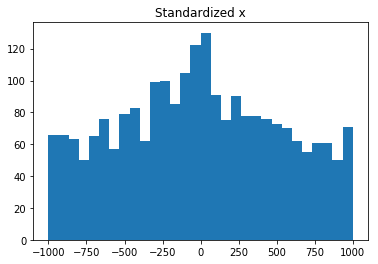

In [176]:
plot_histogram_standardized(Y, 'x', 'xErr', log=False, range=(-1000, 1000))

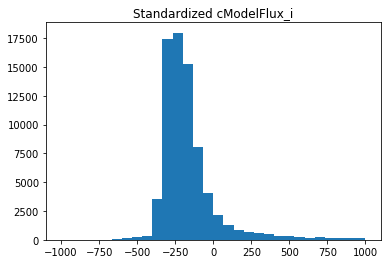

In [160]:
plot_histogram_standardized(Y, 'cModelFlux_i', 'cModelFluxErr_i', log=False, range=(-1000, 1000))

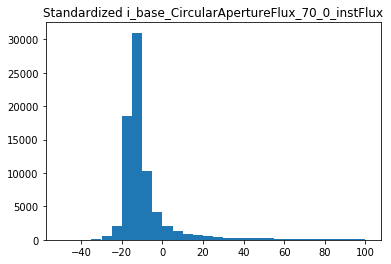

In [163]:
plot_histogram_standardized(Y, 'i_base_CircularApertureFlux_70_0_instFlux', 'i_base_CircularApertureFlux_70_0_instFluxErr', 
                            log=False, range=(-50, 100))

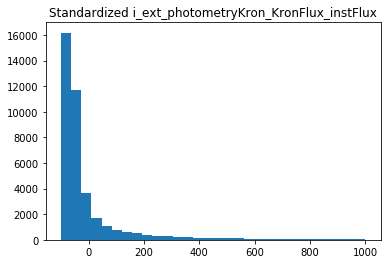

In [170]:
plot_histogram_standardized(Y, 'i_ext_photometryKron_KronFlux_instFlux', 'i_ext_photometryKron_KronFlux_instFluxErr', 
                            log=False, range=(-100, 1000))

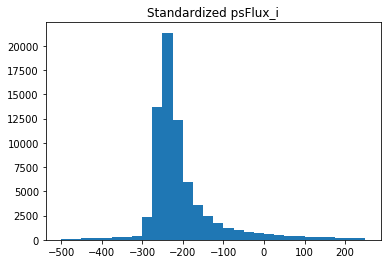

In [175]:
plot_histogram_standardized(Y, 'psFlux_i', 'psFluxErr_i', 
                            log=False, range=(-500, 250))

In [63]:
obj_master.head()

,parentObjectId,Ixy_u,u_ext_photometryKron_KronFlux_flag,cModelFluxErr_r,z_coord_dec,IxyPSF_i,g_ext_photometryKron_KronFlux_psf_radius,cModelFluxErr_g,r_ext_photometryKron_KronFlux_radius,g_ext_photometryKron_KronFlux_radius,y_ext_photometryKron_KronFlux_instFlux,magerr_z,IyyPSF_i,i_ext_photometryKron_KronFlux_instFlux,i_coord_ra,IxxPSF_r,Ixy,g_coord_dec,z_base_CircularApertureFlux_70_0_instFluxErr,z_ext_photometryKron_KronFlux_flag,Iyy_y,y_coord_dec,IxyPSF_r,magerr_r,Ixx,IxyPSF_y,ra_x,u_coord_ra,r_ext_photometryKron_KronFlux_instFluxErr,ext_shapeHSM_HsmPsfMoments_flag,Iyy_u,cModelFlux_r,u_base_CircularApertureFlux_70_0_instFlux,ext_shapeHSM_HsmSourceMoments_xy,cModelFlux_flag_y,IyyPSF_u,y_coord_ra,u_base_CircularApertureFlux_70_0_instFluxErr,psFlux_flag_r,cModelFlux_flag_i,mag_i,r_coord_dec,cModelFlux_flag_u,ext_shapeHSM_HsmPsfMoments_yy,psFluxErr_g,IyyPSF,u_ext_photometryKron_KronFlux_instFluxErr,psFluxErr_z,cModelFlux_u,psFluxErr_i,psFlux_g,psFlux_flag_i,Ixy_i,z_ext_photometryKron_KronFlux_instFluxErr,i_base_CircularApertureFlux_70_0_instFluxErr,psFlux_flag_u,ext_shapeHSM_HsmPsfMoments_xx,Ixy_r,psFluxErr_r,r_ext_photometryKron_KronFlux_instFlux,i_ext_photometryKron_KronFlux_instFluxErr,Iyy,g_coord_ra,tract,Ixx_u,y_ext_photometryKron_KronFlux_instFluxErr,Ixy_g,psFlux_y,dec_x,IyyPSF_g,mag_z,ext_shapeHSM_HsmSourceMoments_xx,u_coord_dec,IxyPSF_g,i_ext_photometryKron_KronFlux_flag,u_ext_photometryKron_KronFlux_radius,IxxPSF_z,Ixx_r,y_ext_photometryKron_KronFlux_radius,i_base_CircularApertureFlux_70_0_instFlux,magerr_i,z_ext_photometryKron_KronFlux_psf_radius,y_base_CircularApertureFlux_70_0_instFlux,ext_shapeHSM_HsmSourceMoments_yy,IxxPSF,cModelFlux_g,cModelFlux_z,r_ext_photometryKron_KronFlux_flag,y_ext_photometryKron_KronFlux_psf_radius,z_coord_ra,mag_g,IxyPSF_u,cModelFluxErr_i,ext_shapeHSM_HsmPsfMoments_xy,xy_flag,cModelFluxErr_z,psFlux_u,cModelFlux_y,psFlux_flag_y,psFlux_z,Ixx_i,Ixx_z,magerr_u,g_ext_photometryKron_KronFlux_flag,cModelFlux_flag_r,Ixx_y,Iyy_z,psFluxErr_u,IxxPSF_u,r_base_CircularApertureFlux_70_0_instFluxErr,g_ext_photometryKron_KronFlux_instFlux,g_base_CircularApertureFlux_70_0_instFluxErr,z_ext_photometryKron_KronFlux_radius,r_base_CircularApertureFlux_70_0_instFlux,i_coord_dec,u_ext_photometryKron_KronFlux_psf_radius,z_base_CircularApertureFlux_70_0_instFlux,i_ext_photometryKron_KronFlux_radius,u_ext_photometryKron_KronFlux_instFlux,x,xErr,IxxPSF_i,z_ext_photometryKron_KronFlux_instFlux,IyyPSF_y,IyyPSF_r,psFluxErr_y,Ixy_z,cModelFluxErr_y,Ixx_g,mag_r,IxyPSF_z,y_ext_photometryKron_KronFlux_flag,mag_u,Iyy_g,psFlux_i,r_ext_photometryKron_KronFlux_psf_radius,psFlux_flag_g,Ixy_y,yErr,y_base_CircularApertureFlux_70_0_instFluxErr,Iyy_r,cModelFluxErr_u,psFlux_r,cModelFlux_flag_z,g_base_CircularApertureFlux_70_0_instFlux,patch,Iyy_i,g_ext_photometryKron_KronFlux_instFluxErr,i_ext_photometryKron_KronFlux_psf_radius,y_x,magerr_y,IxxPSF_g,IxyPSF,cModelFlux_i,extendedness,magerr_g,r_coord_ra,ext_shapeHSM_HsmSourceMoments_flag,psFlux_flag_z,cModelFlux_flag_g,IyyPSF_z,objectId,IxxPSF_y,mag_y,m5_flux,PSF_sigma2,filtSkyBrightness_flux,airmass,dist2Moon,truth_id,ellipticity_2_bulge_true,ellipticity_1_disk_true,mag_true_u_lsst,ellipticity_bulge_true,size_minor_disk_true,dec_true,size_bulge_true,ellipticity_1_bulge_true,galaxy_id,mag_true_i_lsst,redshift_true,mag_true_Y_lsst,ellipticity_2_disk_true,halo_mass,ellipticity_disk_true,sersic_disk,mag_true_r_lsst,size_disk_true,mag_true_z_lsst,size_minor_bulge_true,ra_true,bulge_to_total_ratio_i,mag_true_g_lsst,sersic_bulge,i,g,r,sprinkled,ra_y,u,y_y,z,object_id,redshift,dec_y,agn,star
0,0,NaN,False,32.318510,-0.519271,0.000100,2.228183,60.132860,3.294986,3.294986,38.128962,0.052629,2.060977,34.650223,0.982728,2.065544,0.920701,-0.519271,26.925987,False,7.175100,-0.519271,-0.024338,0.027951,4.137529,0.001996,56.306174,0.982728,0.850797,False,NaN,1340.412469,93.228908,0.920701,False,3.666807,0.982728,29.414078,False,False,23.705315,-0.519271,False,2.062663,34.718758,2.060977,3.521882,7

In [65]:
obj_master[(obj_master['star']==False) & (obj_master['bulge_to_total_ratio_i']==1.0)].head()

,parentObjectId,Ixy_u,u_ext_photometryKron_KronFlux_flag,cModelFluxErr_r,z_coord_dec,IxyPSF_i,g_ext_photometryKron_KronFlux_psf_radius,cModelFluxErr_g,r_ext_photometryKron_KronFlux_radius,g_ext_photometryKron_KronFlux_radius,y_ext_photometryKron_KronFlux_instFlux,magerr_z,IyyPSF_i,i_ext_photometryKron_KronFlux_instFlux,i_coord_ra,IxxPSF_r,Ixy,g_coord_dec,z_base_CircularApertureFlux_70_0_instFluxErr,z_ext_photometryKron_KronFlux_flag,Iyy_y,y_coord_dec,IxyPSF_r,magerr_r,Ixx,IxyPSF_y,ra_x,u_coord_ra,r_ext_photometryKron_KronFlux_instFluxErr,ext_shapeHSM_HsmPsfMoments_flag,Iyy_u,cModelFlux_r,u_base_CircularApertureFlux_70_0_instFlux,ext_shapeHSM_HsmSourceMoments_xy,cModelFlux_flag_y,IyyPSF_u,y_coord_ra,u_base_CircularApertureFlux_70_0_instFluxErr,psFlux_flag_r,cModelFlux_flag_i,mag_i,r_coord_dec,cModelFlux_flag_u,ext_shapeHSM_HsmPsfMoments_yy,psFluxErr_g,IyyPSF,u_ext_photometryKron_KronFlux_instFluxErr,psFluxErr_z,cModelFlux_u,psFluxErr_i,psFlux_g,psFlux_flag_i,Ixy_i,z_ext_photometryKron_KronFlux_instFluxErr,i_base_CircularApertureFlux_70_0_instFluxErr,psFlux_flag_u,ext_shapeHSM_HsmPsfMoments_xx,Ixy_r,psFluxErr_r,r_ext_photometryKron_KronFlux_instFlux,i_ext_photometryKron_KronFlux_instFluxErr,Iyy,g_coord_ra,tract,Ixx_u,y_ext_photometryKron_KronFlux_instFluxErr,Ixy_g,psFlux_y,dec_x,IyyPSF_g,mag_z,ext_shapeHSM_HsmSourceMoments_xx,u_coord_dec,IxyPSF_g,i_ext_photometryKron_KronFlux_flag,u_ext_photometryKron_KronFlux_radius,IxxPSF_z,Ixx_r,y_ext_photometryKron_KronFlux_radius,i_base_CircularApertureFlux_70_0_instFlux,magerr_i,z_ext_photometryKron_KronFlux_psf_radius,y_base_CircularApertureFlux_70_0_instFlux,ext_shapeHSM_HsmSourceMoments_yy,IxxPSF,cModelFlux_g,cModelFlux_z,r_ext_photometryKron_KronFlux_flag,y_ext_photometryKron_KronFlux_psf_radius,z_coord_ra,mag_g,IxyPSF_u,cModelFluxErr_i,ext_shapeHSM_HsmPsfMoments_xy,xy_flag,cModelFluxErr_z,psFlux_u,cModelFlux_y,psFlux_flag_y,psFlux_z,Ixx_i,Ixx_z,magerr_u,g_ext_photometryKron_KronFlux_flag,cModelFlux_flag_r,Ixx_y,Iyy_z,psFluxErr_u,IxxPSF_u,r_base_CircularApertureFlux_70_0_instFluxErr,g_ext_photometryKron_KronFlux_instFlux,g_base_CircularApertureFlux_70_0_instFluxErr,z_ext_photometryKron_KronFlux_radius,r_base_CircularApertureFlux_70_0_instFlux,i_coord_dec,u_ext_photometryKron_KronFlux_psf_radius,z_base_CircularApertureFlux_70_0_instFlux,i_ext_photometryKron_KronFlux_radius,u_ext_photometryKron_KronFlux_instFlux,x,xErr,IxxPSF_i,z_ext_photometryKron_KronFlux_instFlux,IyyPSF_y,IyyPSF_r,psFluxErr_y,Ixy_z,cModelFluxErr_y,Ixx_g,mag_r,IxyPSF_z,y_ext_photometryKron_KronFlux_flag,mag_u,Iyy_g,psFlux_i,r_ext_photometryKron_KronFlux_psf_radius,psFlux_flag_g,Ixy_y,yErr,y_base_CircularApertureFlux_70_0_instFluxErr,Iyy_r,cModelFluxErr_u,psFlux_r,cModelFlux_flag_z,g_base_CircularApertureFlux_70_0_instFlux,patch,Iyy_i,g_ext_photometryKron_KronFlux_instFluxErr,i_ext_photometryKron_KronFlux_psf_radius,y_x,magerr_y,IxxPSF_g,IxyPSF,cModelFlux_i,extendedness,magerr_g,r_coord_ra,ext_shapeHSM_HsmSourceMoments_flag,psFlux_flag_z,cModelFlux_flag_g,IyyPSF_z,objectId,IxxPSF_y,mag_y,m5_flux,PSF_sigma2,filtSkyBrightness_flux,airmass,dist2Moon,truth_id,ellipticity_2_bulge_true,ellipticity_1_disk_true,mag_true_u_lsst,ellipticity_bulge_true,size_minor_disk_true,dec_true,size_bulge_true,ellipticity_1_bulge_true,galaxy_id,mag_true_i_lsst,redshift_true,mag_true_Y_lsst,ellipticity_2_disk_true,halo_mass,ellipticity_disk_true,sersic_disk,mag_true_r_lsst,size_disk_true,mag_true_z_lsst,size_minor_bulge_true,ra_true,bulge_to_total_ratio_i,mag_true_g_lsst,sersic_bulge,i,g,r,sprinkled,ra_y,u,y_y,z,object_id,redshift,dec_y,agn,star
10159,21330551348660270,0.000000,False,32.757122,-0.493693,0.004545,1.766487,38.944084,3.700539,3.700539,151.000708,0.024663,2.089895,57.001206,0.982592,1.902497,0.298584,-0.493693,26.168291,False,8.043227,-0.493693,-0.011940,0.023047,4.781351,-0.001464,56.298368,0.982592,1.013741,False,0.083333,1614.262358,6.701138,0.298584,False,4.400792,0.982592,33.178534,False,False,23.223096,-0.493693,False,2.09074

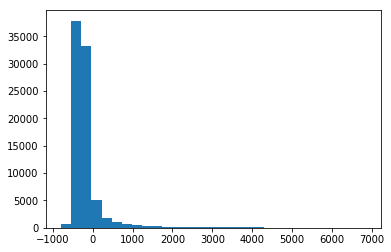

In [11]:
band = 'r'
flux = obj_master['cModelFlux_%s' %band].values
not_nan = np.logical_not(np.isnan(flux))
flux_err = obj_master['cModelFluxErr_%s' %band].values

flux = flux[not_nan]
flux_err = flux_err[not_nan]
_ = plt.hist((flux - np.mean(flux))/flux_err, bins=30)

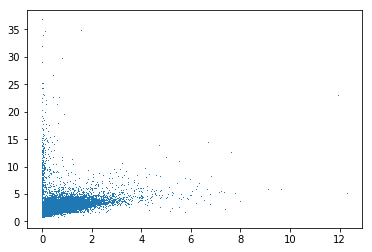

In [17]:
plt.plot(obj_master['size_bulge_true'], np.sqrt(obj_master['Ixx']), linewidth=0.0, marker=',')

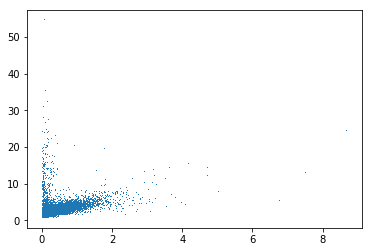

In [19]:
plt.plot(obj_master['size_disk_true'], np.sqrt(obj_master['Iyy']), linewidth=0.0, marker=',')

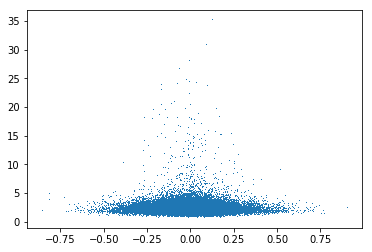

In [32]:
plt.plot(obj_master['ellipticity_2_bulge_true'], np.sqrt(obj_master['Iyy']), linewidth=0.0, marker=',')

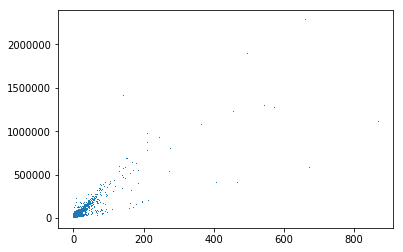

In [30]:
import units_utils as units

plt.plot(units.mag_to_flux(obj_master['mag_true_%s_lsst' %band].values[not_nan], to_unit='nMgy'),
         flux, linewidth=0.0, marker=',')

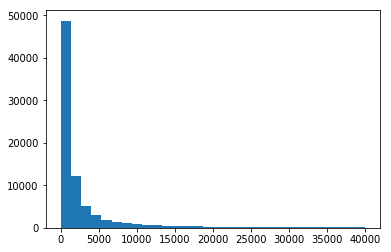

In [37]:
_ = plt.hist(flux, bins=30, range=[0, 40000])